In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('Dataset- Superstore (2015-2018).csv')
sales_data = df[['Order Date', 'Sales']]

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.head()

C:\Users\Shuvo\AppData\Local\Temp\ipykernel_3768\421702860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])


,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


extracting monthly sales 

In [5]:
df1=sales_data.set_index('Order Date')
monthly_sales=df1.resample('ME').sum()
monthly_sales.head()

,Sales
Order Date,
2014-01-31,14236.895
2014-02-28,4519.892
2014-03-31,55691.009
2014-04-30,28295.345
2014-05-31,23648.287


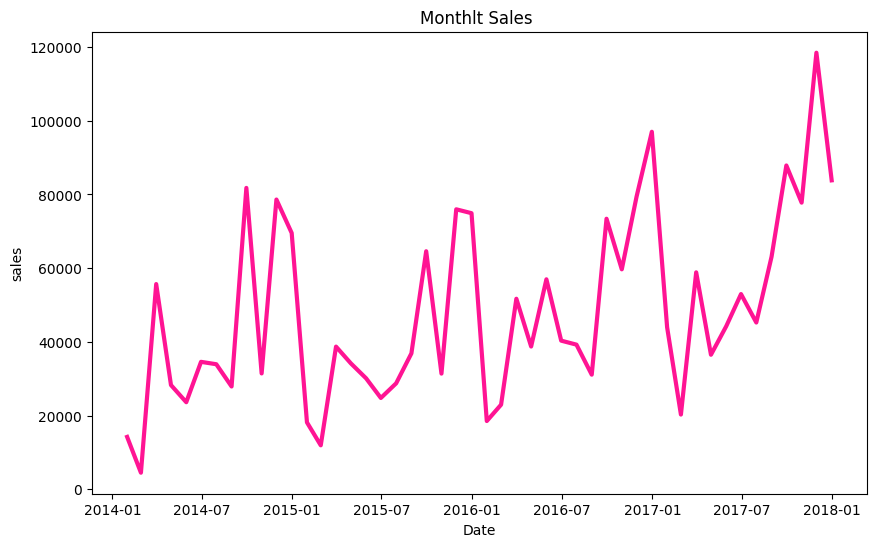

In [6]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Sales'],linewidth=3,c='deeppink')
plt.title('Monthlt Sales ')
plt.xlabel('Date')
plt.ylabel('sales')
plt.show()

stationary check 

In [7]:
def check_stationary(timeseries):
       result=adfuller(timeseries,autolag='AIC')
       p_value=result[1]
       print(f'ADF statistic : {result[0]}')
       print(f'p_value: {p_value}')
       print('Stationary ' if p_value < 0.05 else 'Non-stationary')
check_stationary(monthly_sales['Sales'])

ADF statistic : -4.493767844002665
p_value: 0.00020180198458237758
Stationary 
